# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: MohammadReza Zarei 
2.   Student Number: 401201313


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [2]:
dataset = pd.read_csv("./data/data01.csv")
dataset.drop(dataset.columns[0], axis=1,inplace=True)

# implement the split part
# name them: x_train, x_test, y_train, y_test
dataset = dataset.to_numpy()
train=dataset[:int(len(dataset) * 0.8)]
test = dataset[int(len(dataset) * 0.8):]

x_train = train[: , :-1]
y_train = train[: ,-1]

x_test = test[: , :-1]
y_test = test[: , -1]

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [3]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.

m =  np.polyfit(dataset[:,0],dataset[:,1],1)
m

array([-1.0217644 ,  0.81989668])

In [4]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train, predicted_train_y)
test_error = mean_squared_error(y_test, predicted_test_y)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32477548166322323
MSE test error: 0.35361218290863206


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

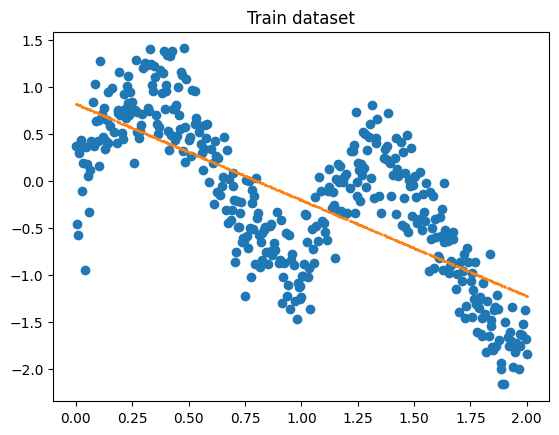

In [5]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

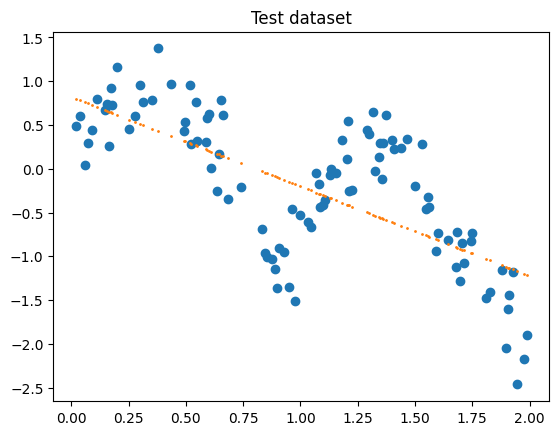

In [6]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable? No, with regard to the result, there is not a good approximation from the model.

What about the line you drew in the last part? It's like the train line.

Was it appropriate for the dataset? No.
<br><br/>
Explain what are the main problems here. As it's clear from the diagram, these data are not linear.

-write here-

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes, In Linear Regression we would fit a straight line to this data but that won’t work here because the data is non-linear and our predictions would end up having large errors. We need to fit a curved line so that our error is minimized.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [7]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp(np.linalg.norm(the_query_point-xi)**2 / (-2 * (hyperparameter **2) ))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [8]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    XTW = np.dot(X.T, W)
    theta = np.dot(np.linalg.inv(np.dot(XTW, X)), np.dot(XTW, train_Y).T)

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [10]:
predicted_test = [predict(x_train, y_train, query, 0.1) for query in x_test]
predicted_test=np.array(predicted_test)
error = float(np.sqrt(np.square(predicted_test[:,0,0]-y_test).mean()))
print(f"MSE test error: {error}")

MSE test error: 0.3254340130173833


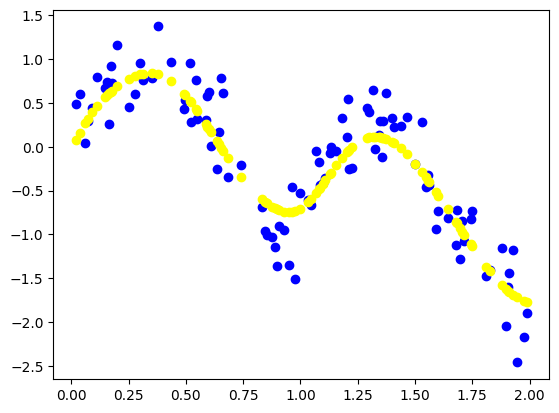

In [11]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

yes, we can see the curve on the distribution of non-linear data.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Yes, some points are not covered and the new method could be better than this one.

### Part10:
Implementing the `KNN model`.

In [12]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = abs(x1-x2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        distances = np.zeros(len(self.X))
        for i, xi in enumerate(self.X):
            distances[i] = self.distance(x, xi)
        indices = indices = np.argsort(distances)[:self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [13]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = np.sqrt(np.square(predicted_y - y_test).mean())
    return error, predicted_y

In [14]:
k = 7
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.3116025150635434


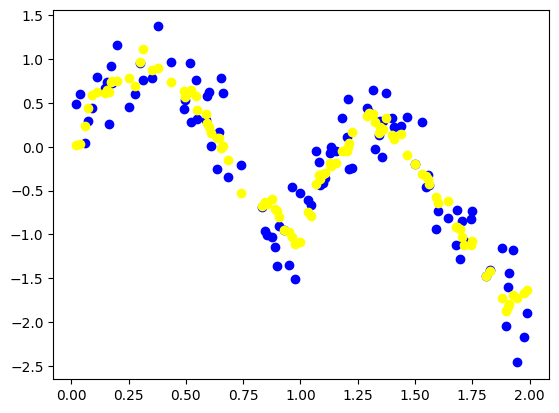

In [15]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

KNN regression is a non-parametric method that, in an intuitive manner, approximates the association between independent variables and the continuous outcome by averaging the observations in the same neighbourhood. The size of the neighbourhood needs to be set by the analyst or can be chosen using cross-validation (we will see this later) to select the size that minimises the mean-squared error.

While the method is quite appealing, it quickly becomes impractical when the dimension increases, i.e., when there are many independent variables.

In [16]:
error_array = []
limit =100

min_error,min_k = None,None

for k in range(1,limit): 
    error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
    error_array.append(error_knn)
    
    if k == 1:
        min_error = error_knn
        min_k = k
    
    if error_knn < min_error:
        min_error = error_knn
        min_k = k
        


print('min of k would be:', min_k,'Min of error would be',min_error )

min of k would be: 19 Min of error would be 0.31124529538206414
